<a href="https://colab.research.google.com/github/Anupa-123/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [524]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from scipy import stats

import warnings
warnings.filterwarnings('ignore')



**Mount the drive and import the dataset.**

In [525]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [526]:
#Reading csv file
data= pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding = "ISO-8859-1")

**Understand more abount the data.**

In [527]:
# Copy the data for backup
df = data.copy()

In [528]:
# Checking of records of the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [529]:
# Checking bottom records in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [530]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Rename Columns**

In [531]:
df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'Dew_Point_Temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'Functioning_Day','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [532]:
# Data shape
df.shape

(8760, 14)

The dataset contains 8760 rows and 14 columns.

In [533]:
 #Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
df['Date']=df['Date'].astype('datetime64[ns]')

In [534]:
# Creating new columns 'Month', 'Year' ,'Day.
df['Month']=df['Date'].dt.month

 #dt.day_name() and dt.month_name()  will give day names and month names
# dt.month will give month numbers as 1,2,3,...12

df['Day']=df['Date'].dt.day_name()    
    
                                                          

In [535]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


In [536]:
# check the Newly Created columns
df.head(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [537]:
# Now We can Drop Day and Date columns.
df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [538]:
#variable which informs us if it is night or day
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [539]:
df.Functioning_Day.value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [540]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [541]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [542]:
#Get distinct categories counts for for Month categories
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [543]:
#Get distinct categories counts for for Weekdays_or_weekend categories
df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [544]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   WindSpeed              8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_Point_Temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Weekdays_or_weekend    8760 non-null   int64  
 15  labe

In [545]:
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [546]:
# Statistical info 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_Point_Temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [547]:
# Print the unique values
df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
WindSpeed                  65
Visibility               1789
Dew_Point_Temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
Month                      12
Weekdays_or_weekend         2
label_day_night             2
dtype: int64

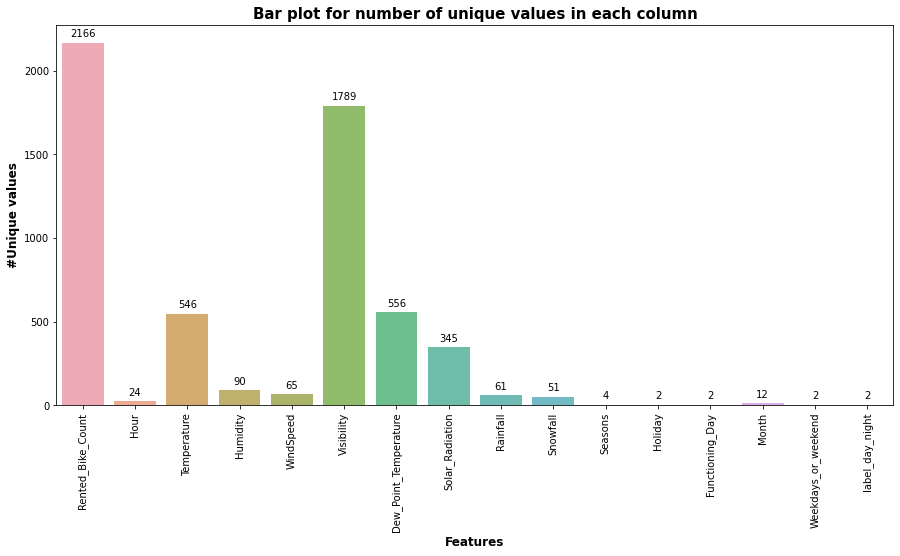

In [548]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Basic cleaning of the data**

**Misssing Values**





In [549]:
# Checking null values of data 
df.isna().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
WindSpeed                0
Visibility               0
Dew_Point_Temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
label_day_night          0
dtype: int64

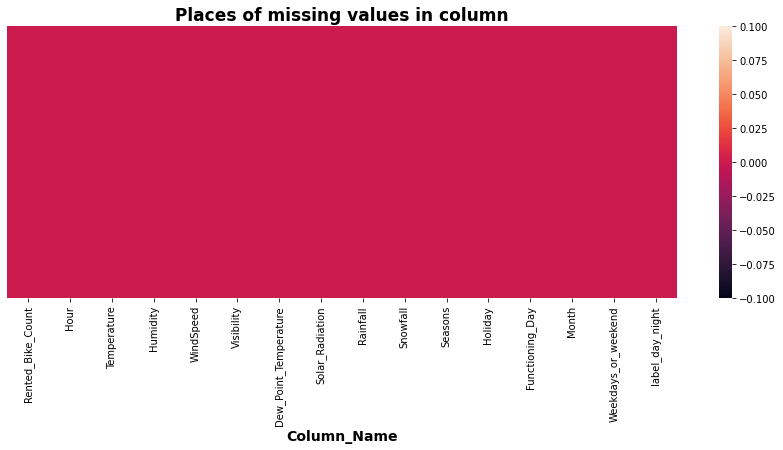

In [550]:
# Missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Duplicate Values**

In [551]:
# Checking duplicate
df.duplicated().sum()

0

As we can see in the above data there is no missng and duplicate value.

**Handling outliers**

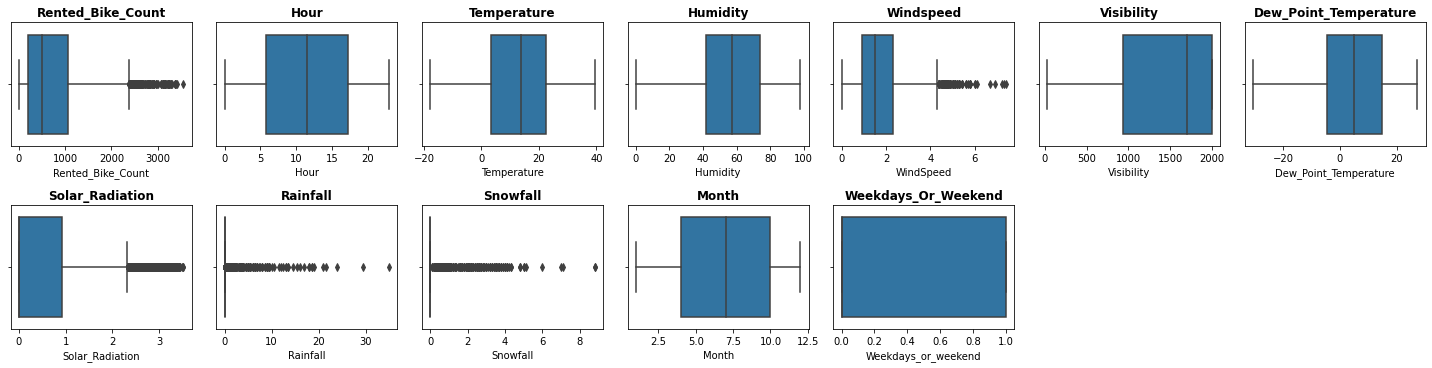

In [552]:
# Checking for outliers
plt.figure(figsize=(20,20))
for n,column in enumerate(df.describe().columns):
  plt.subplot(8,7,n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

We can see outliers are available in some columns like Snowfall, Windspeed, Soalr_Radiation, Rainfall but let's not treat them because they are rare event. 

So let's treat outliers of dependent variable by capping with IQR limits.

In [553]:
# Removing outliers by Using IQR method:
q1, q3, median = df.Rented_Bike_Count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['bike_count'] = np.where(df['Rented_Bike_Count'] > upper_limit, median,np.where(
                            df['Rented_Bike_Count'] < lower_limit,median,df['Rented_Bike_Count']))

# Removing outliers by Capping:
for col in ['WindSpeed','Solar_Radiation','Rainfall','Snowfall']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

We don't think of worry about outliers in this data

# **Exploratory data analysis(EDA)**

When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature.

In [554]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [555]:
# Divide Data in categorical and numerical features
numeric_columns= df.select_dtypes(exclude='object')
categorical_columns=df.select_dtypes(include='object')

In [556]:
numeric_columns.head()

,Rented_Bike_Count,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend,bike_count
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,254.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,204.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,173.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,107.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,78.0


In [557]:
categorical_columns.head()

,Hour,Seasons,Holiday,Functioning_Day,label_day_night
0,0,Winter,No Holiday,Yes,Night
1,1,Winter,No Holiday,Yes,Night
2,2,Winter,No Holiday,Yes,Night
3,3,Winter,No Holiday,Yes,Night
4,4,Winter,No Holiday,Yes,Night


# **Univariate Analysis**

In this we'll just focus on the dependent variable,a dependent variable is a variable whose value will change depending on the value of another variable.
 

**Bike rented trend according to hour**

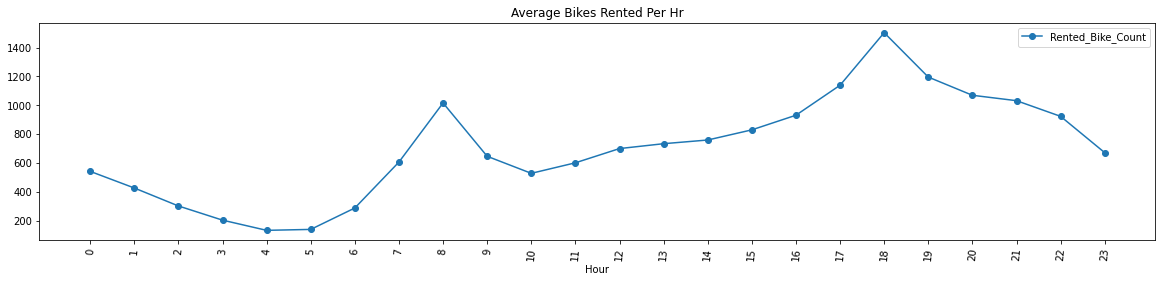

In [558]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

We can clearly see that high rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

We can observe from the above plot that there is sudden peak between 6PM to 10 PM.
Office time,College and going time could be the reason for this sudden peak (Weekdays). But on Weekend the case is different less bike rentals happend.


**Bike rented trend according to month**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

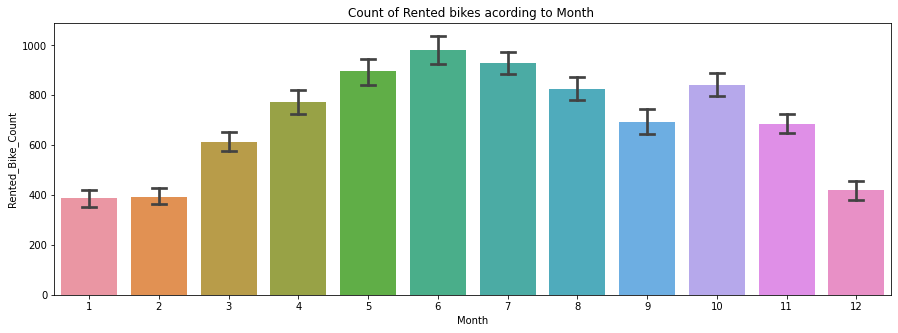

In [559]:
#Monthly trend of bike demand
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

Above barplot shows that from March Bike Rent Count started increasing and it was highest in June.

**Trend of bike according to temperature**

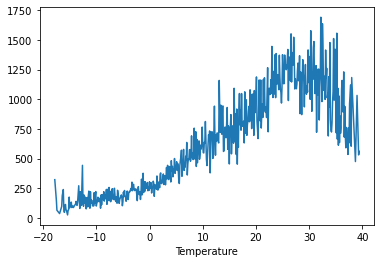

In [560]:
# Plot to see trend of bike according to temperature
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average

**Plot of rented bikes according to rainfall**

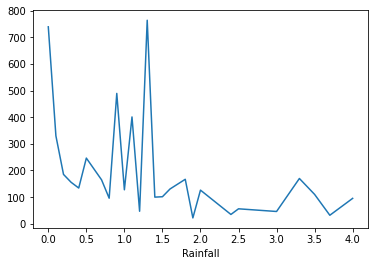

In [561]:
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes

**Trend of rented bike according to snowfall**

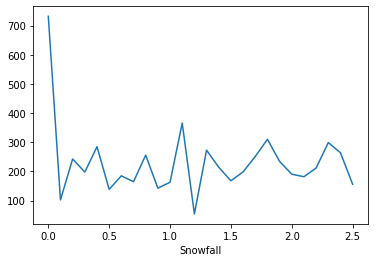

In [562]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower

**Trend of Bike according to Functioning Day** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

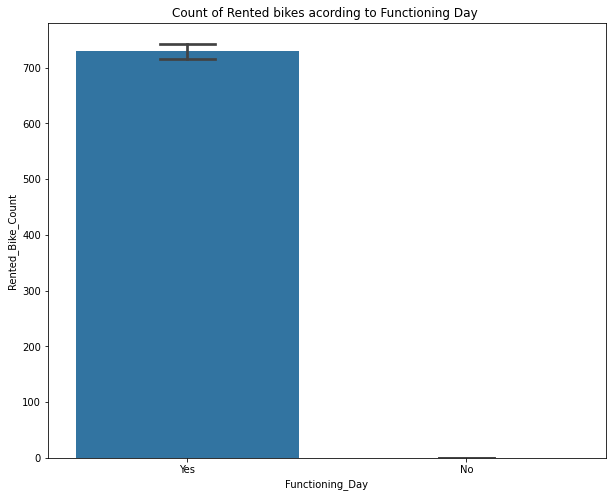

In [563]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

From above plot we can see that peoples dont use reneted bikes in no functioning day.

# **Bivariate Analysis**

**Trend of bikes according to weedays or weekend**

In [564]:
df1VizDays=pd.DataFrame(df.groupby('Weekdays_or_weekend').sum()['Rented_Bike_Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented_Bike_Count
Weekdays_or_weekend,
0,4462544
1,1709770


**Bike rented according to hour on weekdays or on weekend**

[Text(0.5, 1.0, 'Count of bikes during different days')]

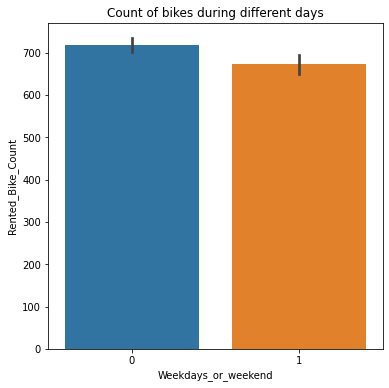

In [565]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(data=df, x='Weekdays_or_weekend', y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of bikes during different days')

 Most of the bikes were rented on Weekdays compared to weekends.

**Trend of bike according to functioning day**

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

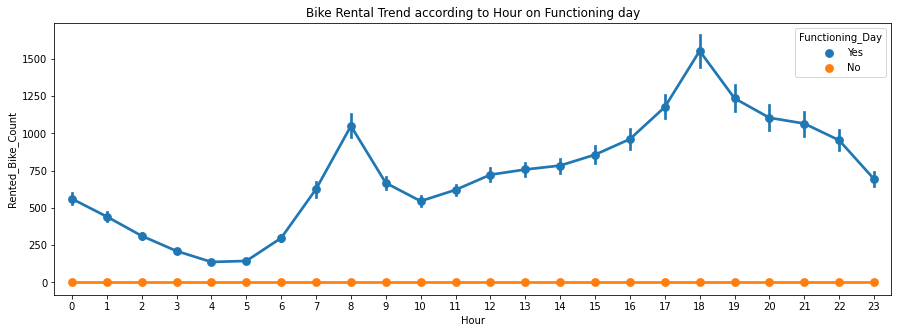

In [566]:
#Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(15,5))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Here the trend for functioning day is same as of Weekdays. Only the difference is on No functioning day there is no bike rentals.

**Trend of rented bike according to seasons**

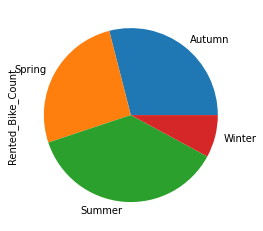

In [567]:
df.groupby('Seasons').sum()['Rented_Bike_Count'].plot.pie()

We observe that in the summer season trend of rented bike is high.

**Trend of rented bikes according to month and hour**

[Text(0.5, 1.0, 'Count of bikes during different months')]

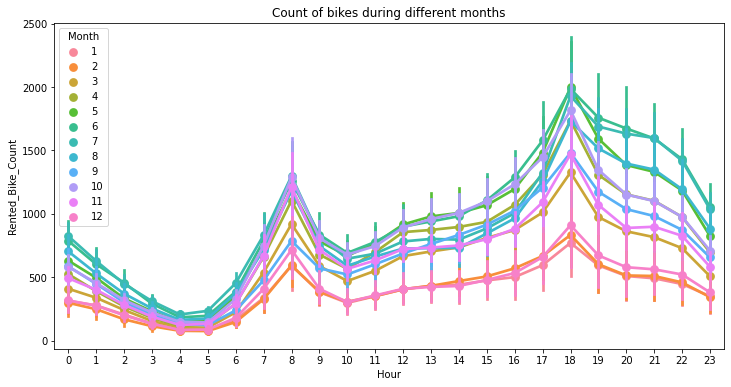

In [568]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Month', ax=ax)
ax.set(title='Count of bikes during different months')

Our plot shows that there was a high trend of rented bikes in the month of june and around 6:00PM to 10:PM bikes were rented most.

# **Numeric Variable Analysis**

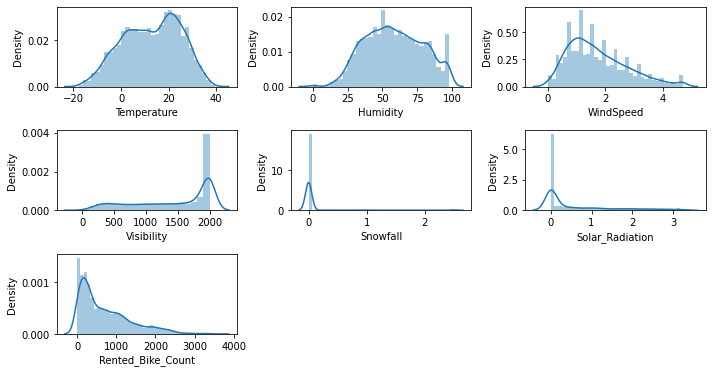

In [569]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["Temperature", "Humidity", "WindSpeed", "Visibility", "Snowfall","Solar_Radiation", "Rented_Bike_Count"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(df[j])
    plt.tight_layout()

Here we obsereved that

Humidity is most likely to be between 50-75 units.

Windspeed is most commonly seen between 8-12 units.

People like to ride bikes around 25°C in average.

Visibility is highest at 2000.

# **Categorical Variable Analysis**

In [570]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')
categorical_features

,Hour,Seasons,Holiday,Functioning_Day,label_day_night
0,0,Winter,No Holiday,Yes,Night
1,1,Winter,No Holiday,Yes,Night
2,2,Winter,No Holiday,Yes,Night
3,3,Winter,No Holiday,Yes,Night
4,4,Winter,No Holiday,Yes,Night
...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,Day
8756,20,Autumn,No Holiday,Yes,Day
8757,21,Autumn,No Holiday,Yes,Night
8758,22,Autumn,No Holiday,Yes,Night


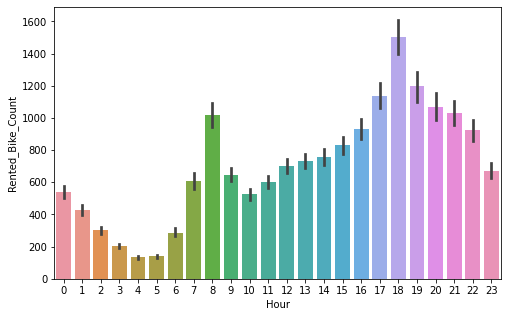

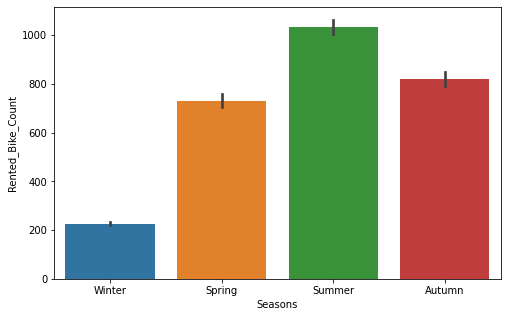

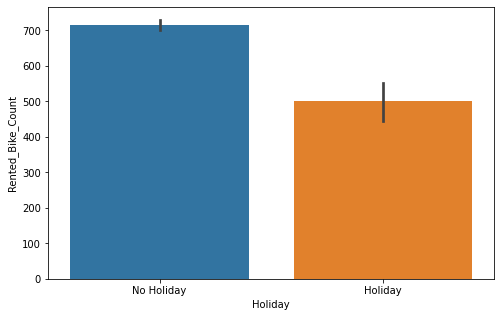

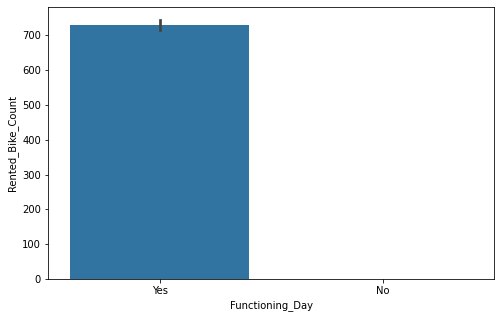

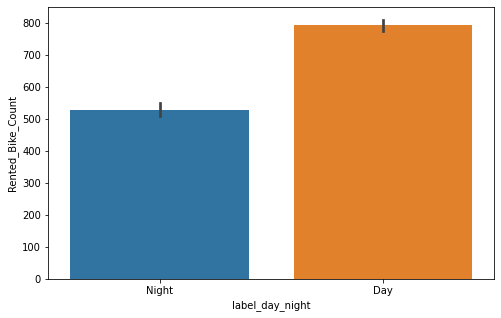

In [571]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    sns.barplot(x=df[col],y=df['Rented_Bike_Count'])

 From above plots we observed that:
 
 1)Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

4) Most of the bikes were rented on Weekdays compared to weekends.

5) From March Bike Rent Count started increasing and it was highest in June.

6)There are much more rents during the day than the night.

# **Heatmap**

Let see the correlation between variables using correlation heatmap.

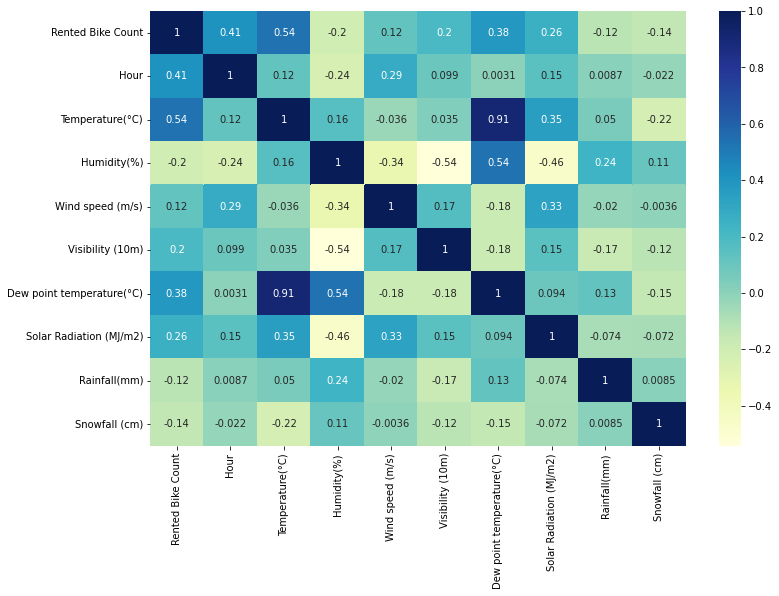

In [572]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()


Here, temperature and dew point temperature are highly correlated means both the variables together cannot be used in model because it will lead to multicollinearity.

As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

# **Modeling**

Lets prepare data for modeling

In [573]:
df.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend,label_day_night,bike_count
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,Night,254.0


In [574]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_Point_Temperature',inplace=True,axis=1)

In [575]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [576]:
# Calculating VIF
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,4.318227
1,Humidity,6.422808
2,WindSpeed,4.262686
3,Visibility,5.480300
4,Solar_Radiation,2.288343
5,Rainfall,1.207448
6,Snowfall,1.152133
7,Month,4.610178
8,Weekdays_or_weekend,1.399435
9,bike_count,3.566031


Here, humidity vif is greater than 5 so we will remove that column.

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

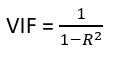

In [577]:
# Calculating VIF
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Temperature,3.409826
1,WindSpeed,3.033186
2,Solar_Radiation,1.917731
3,Rainfall,1.115238
4,Snowfall,1.099430
5,Month,2.962954
6,Weekdays_or_weekend,1.343680
7,bike_count,3.439962


Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [578]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [579]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [580]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [581]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [582]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [583]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [584]:
# checking dummy and labled columns
df.head(3)

,Rented_Bike_Count,Hour,Temperature,WindSpeed,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Weekdays_or_weekend,label_day_night,bike_count,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,2.2,0.0,0.0,0.0,0,1,1,0,Night,254.0,0,0,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,0,1,1,0,Night,204.0,0,0,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,0,1,1,0,Night,173.0,0,0,1


In [585]:
# final info before going for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   object 
 2   Temperature          8760 non-null   float64
 3   WindSpeed            8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  label_day_night      8760 non-null   object 
 12  bike_count           8760 non-null   float64
 13  Seasons_Spring       8760 non-null   uint8  
 14  Seasons_Summer       8760 non-null   uint8  
 15  Seasons_Winter       8760 non-null   u

# **Checking For Linearity**

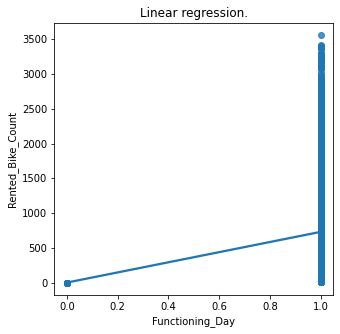

In [586]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Functioning_Day')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Functioning_Day'],y=df['Rented_Bike_Count'])

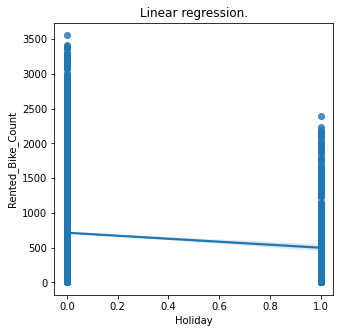

In [587]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Holiday')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Holiday'],y=df['Rented_Bike_Count'])

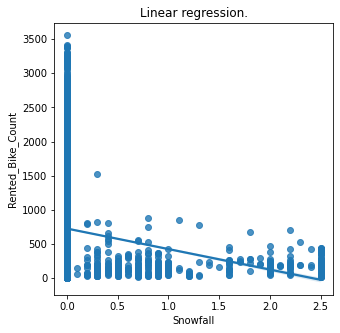

In [588]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Snowfall')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Snowfall'],y=df['Rented_Bike_Count'])

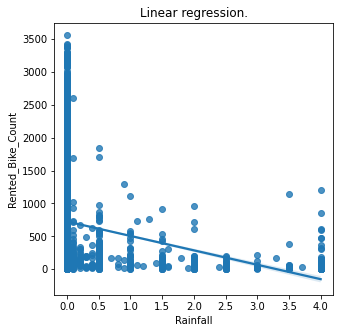

In [589]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Rainfall')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Rainfall'],y=df['Rented_Bike_Count'])

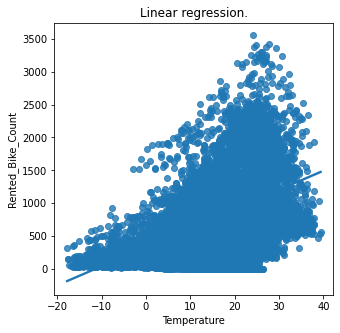

In [590]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Temperature	')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Temperature'],y=df['Rented_Bike_Count'])

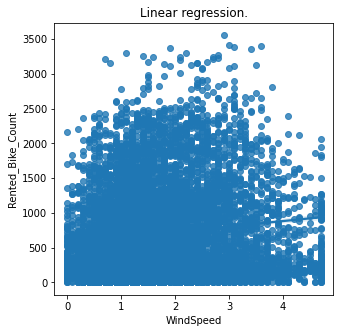

In [591]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('WindSpeed')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['WindSpeed'],y=df['Rented_Bike_Count'])

From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable. Which means the rented bike count increases with increase of these features.

'Rainfall', 'Snowfall', 'Holiday' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

**Normalized the data**

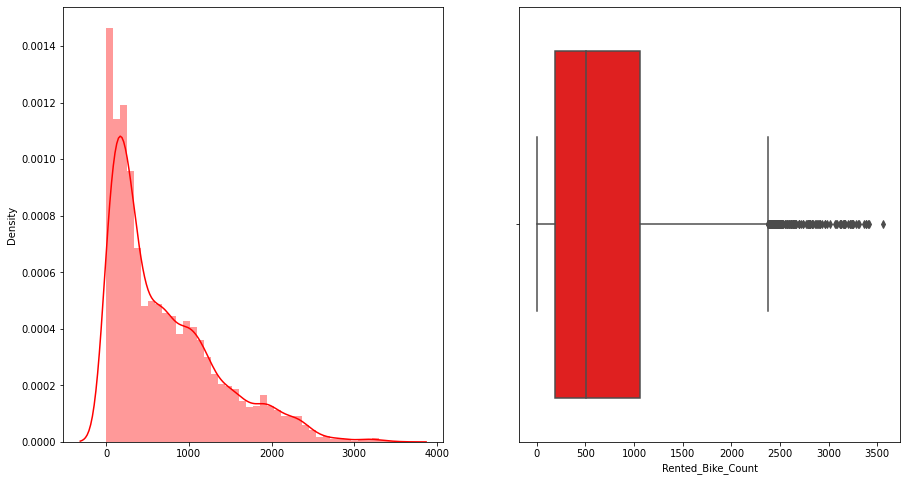

In [592]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=df['Rented_Bike_Count'],color='red',ax=axes[1])

In [593]:
###  Our target varibale's distribution is slightly right skewed.

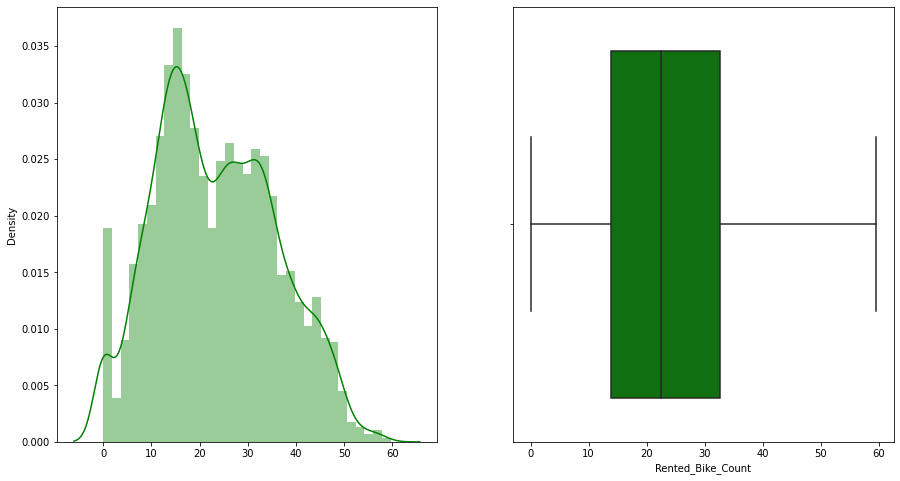

In [594]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[1])

Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present.

# **Linear Regression**

In [595]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X = df[['Hour','Temperature','WindSpeed','Solar_Radiation','Rainfall','Snowfall','Seasons_Spring','Seasons_Summer','Seasons_Winter','Holiday','Functioning_Day','Month']]
y = np.sqrt(df['Rented_Bike_Count'])

In [596]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [597]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 12)
(7008,)
(1752, 12)
(1752,)


In [598]:
 #Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [599]:
#Regression coefficient
regressor.coef_

array([ 0.56093049,  0.42915337,  0.50958615,  0.72951601, -6.41341019,
       -1.23981173, -2.95466287, -3.31038337, -6.8498127 , -2.54381605,
       28.60870194,  0.06153837])

In [600]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [601]:
r2_score(y_test, y_pred)

0.6412225788636727

In [602]:
# Validating Assumptions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [603]:
# Test dataset metrics
def print_metrics(actual, predicted):
  print_metrics(y_test, y_test_pred)

**Evaluation of train data set**

In [604]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_train_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_train_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_train_pred)
print(f"The R2 Score is {R2}.")

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


The Mean Absolute Error (MAE) is 5.652278970467949.
The Mean Squred Error(MSE) is 54.580008689251486.
The Root Mean Squared Error(RMSE) is 7.387828414984439.
The R2 Score is 0.6463493529401576.
Adjusted R2 : 0.6439089804475078


In [605]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_lr ),3)
            }


In [606]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear Regression,5.6523,54.58,7.3878,0.6463,0.644


**Evaluation of test data set**

In [607]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


 The Mean Absolute Error (MAE) is 5.746420290621209.
 The Mean Squred Error(MSE) is 56.502513214533074.
The Root Mean Squared Error(RMSE) is 7.516815363871396.
The R2 Score is 0.6412225788636727.
Adjusted R2 : 0.6387468289765905


In [608]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
           'Adjusted R2':round((Adjusted_R2_lr ),3)}

In [609]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear Regression,5.7464,56.5025,7.5168,0.6412,0.639


We have observed that on testing data R2 score is 0.6184 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. Let's try homoscedasticity

In [610]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

Text(0.5, 0, 'y_predicted')

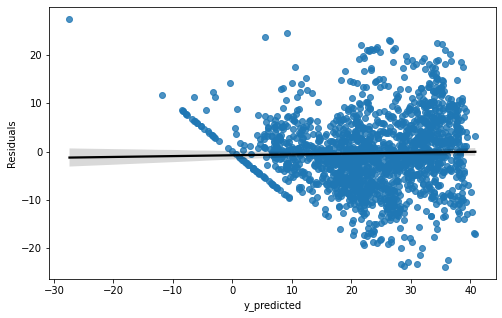

In [611]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(8,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'Black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Homoscedasticity (meaning “same variance”) describes a situation in which the error term is the same across all values of the independent variables. Residuals are nothing but difference between actual and predicted value.This homoscedasticity plot shows that the mean of residual is very close to zero. So we are very close to our predicted value.

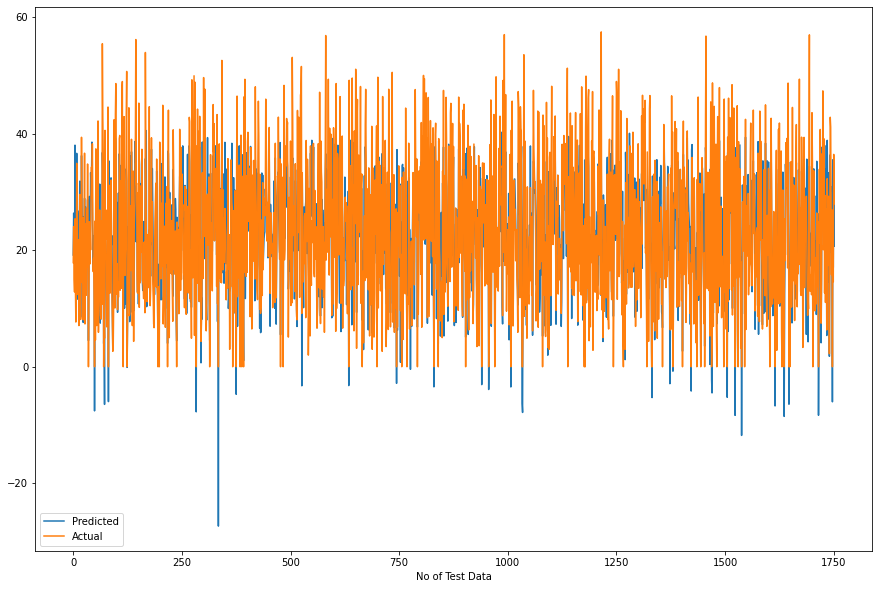

In [612]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

This plot shows the actual and predicted values of number of test data. 

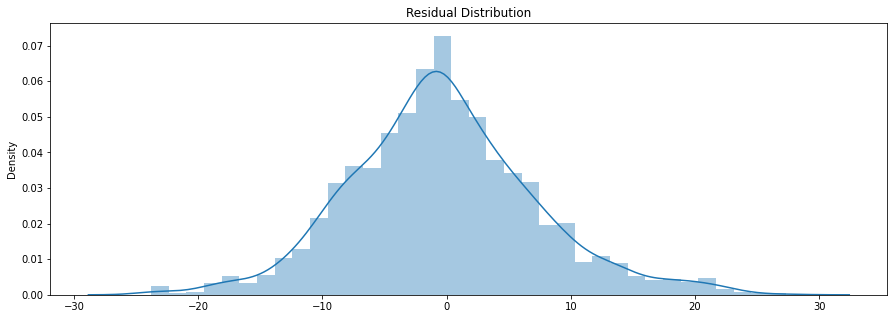

In [613]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# **Lasso Regression**

In [614]:
# instantiating
lasso_reg=Lasso(alpha=0.01)

In [615]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [616]:
# Check coefficient
lasso_reg.coef_

array([ 0.56158275,  0.43072963,  0.49188485,  0.71720708, -6.37891874,
       -1.15192697, -2.70807533, -3.09398832, -6.60773117, -2.33591364,
       28.15911306,  0.06960684])

In [617]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

,X,Coeficients
0,Hour,0.561583
1,Temperature,0.430730
2,WindSpeed,0.491885
3,Solar_Radiation,0.717207
4,Rainfall,-6.378919
5,Snowfall,-1.151927
6,Seasons_Spring,-2.708075
7,Seasons_Summer,-3.093988
8,Seasons_Winter,-6.607731
9,Holiday,-2.335914


In [618]:
# Check score on train dataset
lasso_reg.score(X_train,y_train)

0.6462517886621248

In [619]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.6407642679881143

In [620]:
# Check intercept
lasso_reg.intercept_

-13.513207895798175

In [621]:
# y prdiction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)

**Evaluation On Train Data.**

In [622]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


The Mean Absolute Error (MAE) is 5.6539802141447355.
The Mean Squred Error(MSE) is 54.59506608893973.
The Root Mean Squared Error(RMSE) is 7.388847412752528.
The R2 Score is 0.6462517886621248.
Adjusted R2 : 0.6456449296862772


In [623]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_lr ),3)}

In [624]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.6523,54.5800,7.3878,0.6463,0.644
1,Lasoo,5.6540,54.5951,7.3888,0.6463,0.646


**Evaluation On Test Data.**

In [625]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


 The Mean Absolute Error (MAE) is 5.75285760621734.
 The Mean Squred Error(MSE) is 56.574690878948495.
The Root Mean Squared Error(RMSE) is 7.52161491163623.
The R2 Score is 0.6407642679881143.
Adjusted R2 : 0.6387468289765905


In [626]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
           'Adjusted R2':round((Adjusted_R2_lr ),3)}

In [627]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.7464,56.5025,7.5168,0.6412,0.639
1,Lasso,5.7529,56.5747,7.5216,0.6408,0.639


On testing data R2 score is 0.5893 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.

In [628]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(15,5))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [629]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(15,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

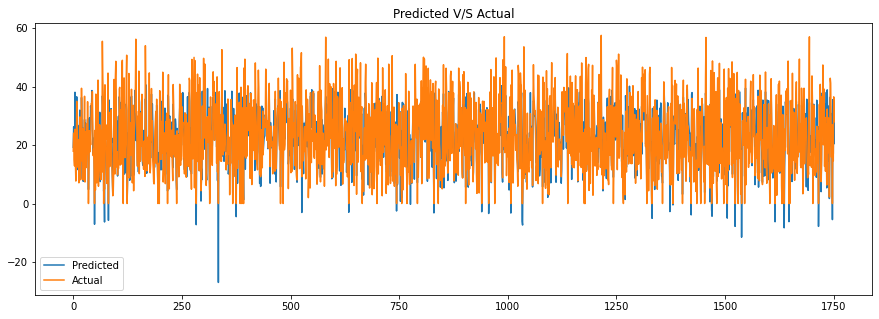

In [630]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(15,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

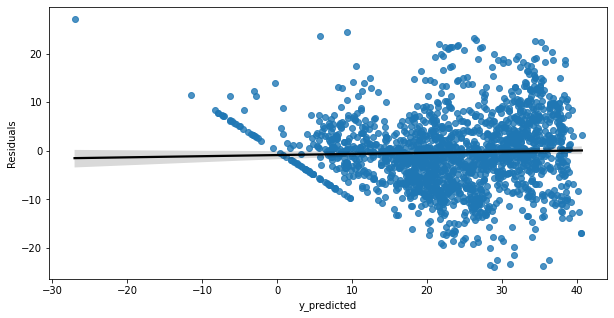

In [631]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

# **Ridge Regression**

In [632]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [633]:
# fitting and training
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [634]:
#check the score
ridge.score(X_train, y_train)

0.6463493101434832

In [635]:
# check coefficient
ridge.coef_

array([ 0.56093873,  0.42915835,  0.50946574,  0.72954114, -6.41300748,
       -1.23969868, -2.95206397, -3.30774732, -6.84668241, -2.54341886,
       28.59396851,  0.06162521])

In [636]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Hour,0.560939
Temperature,0.429158
WindSpeed,0.509466
Solar_Radiation,0.729541
Rainfall,-6.413007
Snowfall,-1.239699
Seasons_Spring,-2.952064
Seasons_Summer,-3.307747
Seasons_Winter,-6.846682
Holiday,-2.543419


In [637]:
# Check intercept
ridge.intercept_

-13.698388096538558

In [638]:
# y predictions on training dataset
y_pred_train_ridge=ridge.predict(X_train)
# y predictions on test dataset
y_pred_ridge=ridge.predict(X_test)

# **Hyperparameter tunning**

In [639]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

**Evaluation On Train Data.**

In [640]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


The Mean Absolute Error (MAE) is 5.6539802141447355.
The Mean Squred Error(MSE) is 54.59506608893973.
The Root Mean Squared Error(RMSE) is 7.388847412752528.
The R2 Score is 0.6462517886621248.
Adjusted R2 : 0.6456449296862772


In [641]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
            'Adjusted R2':round((Adjusted_R2_lr ),3)}

In [642]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.6523,54.5800,7.3878,0.6463,0.644
1,Lasoo,5.6540,54.5951,7.3888,0.6463,0.646
2,Ridge GridSearchCV,5.6540,54.5951,7.3888,0.6463,0.646


**Evaluation On Test Data.**

In [643]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


 The Mean Absolute Error (MAE) is 5.75285760621734.
 The Mean Squred Error(MSE) is 56.574690878948495.
The Root Mean Squared Error(RMSE) is 7.52161491163623.
The R2 Score is 0.6407642679881143.
Adjusted R2 : 0.6387468289765905


In [644]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
           'Adjusted R2':round((Adjusted_R2_lr ),3)}

In [645]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.7464,56.5025,7.5168,0.6412,0.639
1,Lasso,5.7529,56.5747,7.5216,0.6408,0.639
2,Ridge(GridsearchCv Tunned),5.7529,56.5747,7.5216,0.6408,0.639


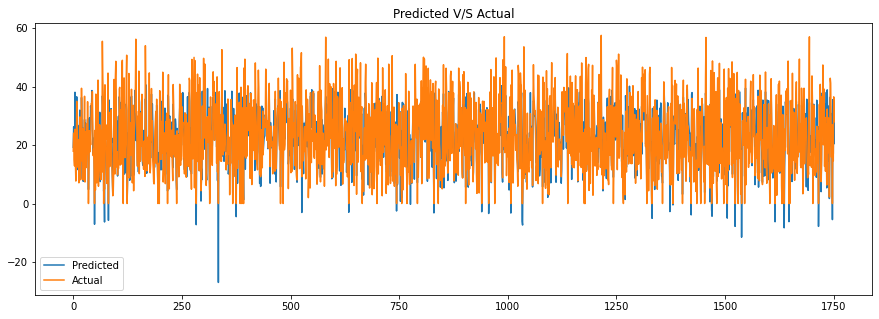

In [646]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

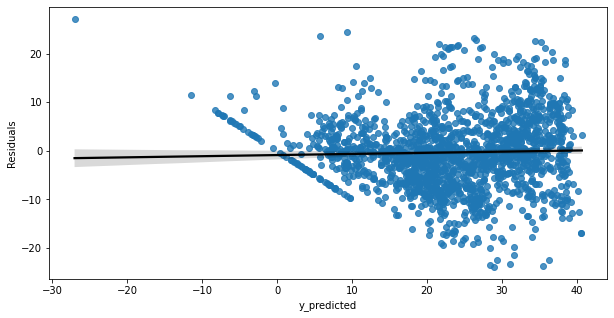

In [647]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

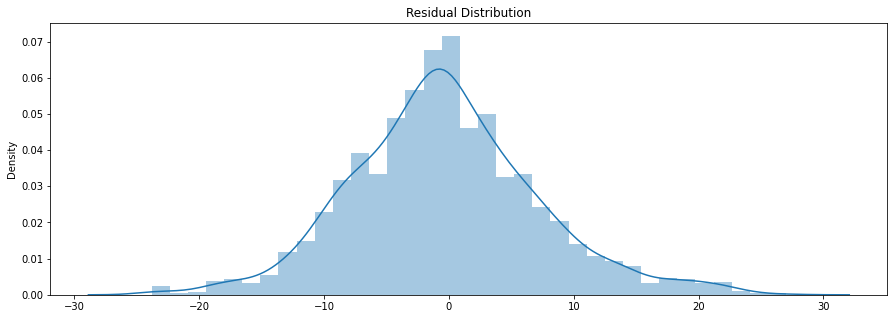

In [648]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# **Decision Tree Regression**

In [649]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,criterion='mse',
                      max_features=9, max_leaf_nodes=100)

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=9,
                      max_leaf_nodes=100)

In [650]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8522236780959787

In [651]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.843471028093699

In [652]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

**Evaluation of train data set**

In [653]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
adj_r2=1-(1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"The Adjusted R2 is {adj_r2}.")


The Mean Absolute Error (MAE) is 3.340413337785198.
The Mean Squred Error(MSE) is 22.806781213727838.
The Root Mean Squared Error(RMSE) is 4.775644586202771.
The R2 Score is 0.8522236780959787.
The Adjusted R2 is 0.8512039449948583.


In [654]:
# Let's create dictionery of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
            'Adjusted R2':round((adj_r2),3)}

In [655]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.6523,54.5800,7.3878,0.6463,0.644
1,Lasoo,5.6540,54.5951,7.3888,0.6463,0.646
2,Ridge GridSearchCV,5.6540,54.5951,7.3888,0.6463,0.646
3,Decision Tree Regressor-GridSearchCV,3.3404,22.8068,4.7756,0.8522,0.851


**Evaluation of test data set**

In [656]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_test_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_test_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_test_pred)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
adj_r2=1-(1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"The Adjusted R2 is {adj_r2}.")
  


 The Mean Absolute Error (MAE) is 5.746420290621209.
 The Mean Squred Error(MSE) is 56.502513214533074.
The Root Mean Squared Error(RMSE) is 7.516815363871396.
The R2 Score is 0.6412225788636727.
The Adjusted R2 is 0.6387468289765905.


In [657]:
test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
              'Adjusted R2':round((adj_r2),3)}

In [658]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.7464,56.5025,7.5168,0.6412,0.639
1,Lasso,5.7529,56.5747,7.5216,0.6408,0.639
2,Ridge(GridsearchCv Tunned),5.7529,56.5747,7.5216,0.6408,0.639
3,Decision Tree Regressor(GridsearchCV),5.7464,56.5025,7.5168,0.6412,0.639


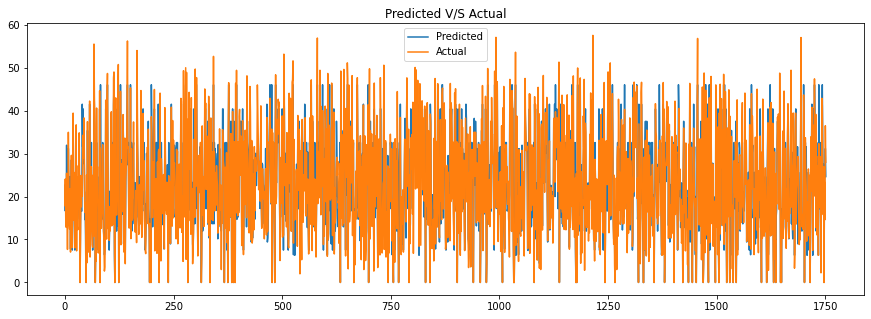

In [659]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

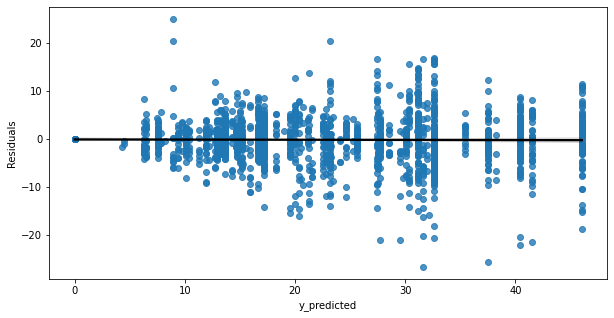

In [660]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Text(0.5, 0, 'Relative Importance')

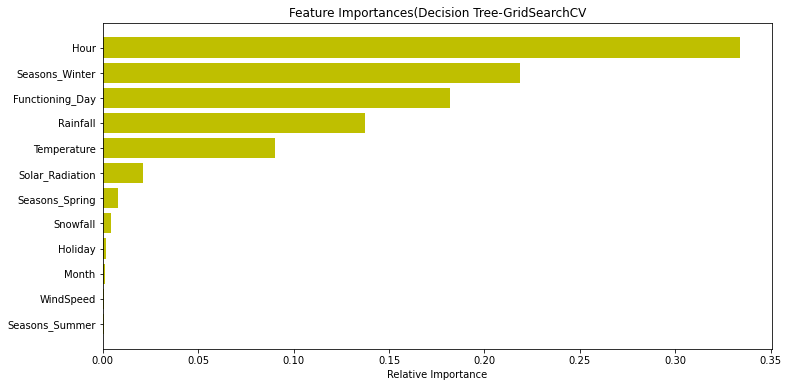

In [661]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

# **Hyperparameter Tuning**

In [662]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [663]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'], 'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [664]:
tuning_model.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [665]:
D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

Text(0.5, 0, 'Relative Importance')

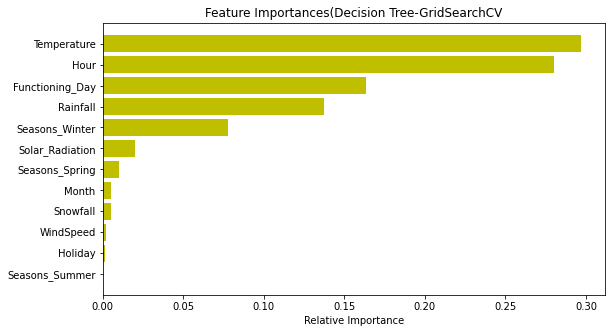

In [666]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,5))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

We have applied this best parametrs to above Decsion tree regressor model.

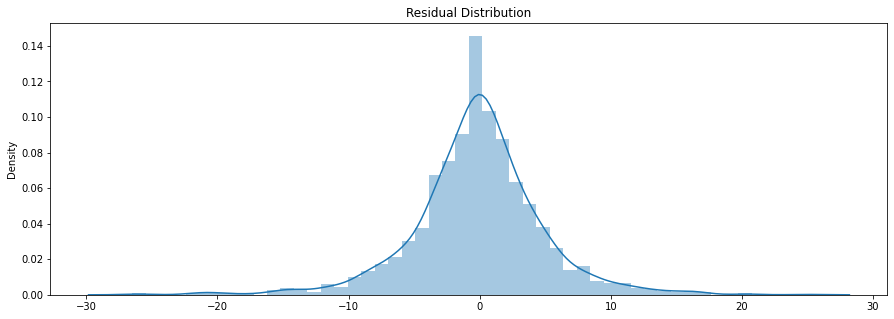

In [667]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

As We have saw in linear regression,lasso, and ridge we are getting almost similar r2 scores.

# **Gradient Boosting Regressor**

In [668]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [669]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [670]:
# Evaluation of training data set
from sklearn.metrics import mean_squared_error
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculate Adjusted R2
adj_r2=1-(1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"The Adjusted R2 is {adj_r2}.")



The Mean Absolute Error (MAE) is 3.2433747553596155.
The Mean Squred Error(MSE) is 21.24209877732028.
The Root Mean Squared Error(RMSE) is 4.608915141041358.
The R2 Score is 0.8623620230572113.
The Adjusted R2 is 0.8614122497833105.


In [671]:
train_dict={'Model':"Gardient boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
            'Adjusted R2':round((adj_r2 ),3)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.6523,54.5800,7.3878,0.6463,0.644
1,Lasoo,5.6540,54.5951,7.3888,0.6463,0.646
2,Ridge GridSearchCV,5.6540,54.5951,7.3888,0.6463,0.646
3,Decision Tree Regressor-GridSearchCV,3.3404,22.8068,4.7756,0.8522,0.851
4,Gardient boosting Regression,3.2434,21.2421,4.6089,0.8624,0.861


In [672]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Adjusted R2 score
adj_r2=1-(1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"The adjusted R2 is {adj_r2}") 


 The Mean Absolute Error (MAE) is 3.340299703619534.
 The Mean Squred Error(MSE) is 22.966344615316345.
The Root Mean Squared Error(RMSE) is 4.792321422371035.
The R2 Score is 0.854169214336965.
The adjusted R2 is 0.853162906442798


In [673]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
           'Adjusted R2':round((adj_r2 ),3)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.7464,56.5025,7.5168,0.6412,0.639
1,Lasso,5.7529,56.5747,7.5216,0.6408,0.639
2,Ridge(GridsearchCv Tunned),5.7529,56.5747,7.5216,0.6408,0.639
3,Decision Tree Regressor(GridsearchCV),5.7464,56.5025,7.5168,0.6412,0.639
4,Gradient Boosting Regression,3.3403,22.9663,4.7923,0.8542,0.853


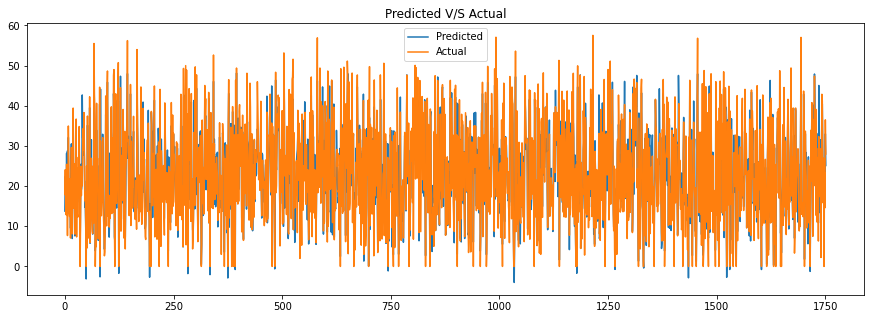

In [674]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

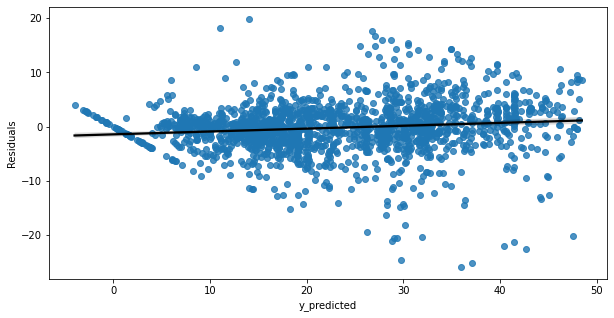

In [675]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

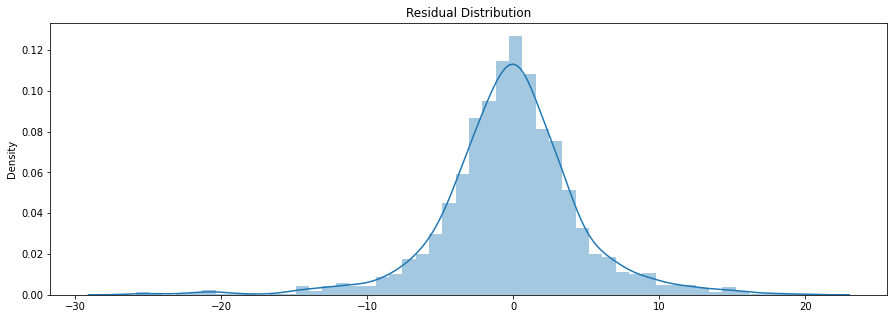

In [676]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# **Random Forest Regressor**

In [677]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [678]:
rf.score(X_train,y_train)

0.9832966833352321

In [679]:
rf.score(X_test,y_test)

0.889369541045348

In [680]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

**Evaluation of train data set**

In [681]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2
adj_r2=1-(1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"The Adjusted R2 is {adj_r2}.")


The Mean Absolute Error (MAE) is 1.0567916513161888.
The Mean Squred Error(MSE) is 2.577875019547421.
The Root Mean Squared Error(RMSE) is 1.605576226638717.
The R2 Score is 0.9832966833352321.
The Adjusted R2 is 0.9831814218056305.


In [682]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round((R2),4),
             'Adjusted R2':round((adj_r2),3)}


traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.6523,54.5800,7.3878,0.6463,0.644
1,Lasoo,5.6540,54.5951,7.3888,0.6463,0.646
2,Ridge GridSearchCV,5.6540,54.5951,7.3888,0.6463,0.646
3,Decision Tree Regressor-GridSearchCV,3.3404,22.8068,4.7756,0.8522,0.851
4,Gardient boosting Regression,3.2434,21.2421,4.6089,0.8624,0.861
5,Random Forest,1.0568,2.5779,1.6056,0.9833,0.983


**Evaluation of test data set**

In [683]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2
adj_r2=1-(1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"The adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 2.7805558215610597.
 The Mean Squred Error(MSE) is 17.422776910590155.
The Root Mean Squared Error(RMSE) is 4.174060003233082.
The R2 Score is 0.889369541045348.
The adjusted R2 is 0.8886061336230042.


In [684]:
test_dict={'Model':"Random forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
           'Adjusted R2':round((adj_r2),3)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.7464,56.5025,7.5168,0.6412,0.639
1,Lasso,5.7529,56.5747,7.5216,0.6408,0.639
2,Ridge(GridsearchCv Tunned),5.7529,56.5747,7.5216,0.6408,0.639
3,Decision Tree Regressor(GridsearchCV),5.7464,56.5025,7.5168,0.6412,0.639
4,Gradient Boosting Regression,3.3403,22.9663,4.7923,0.8542,0.853
5,Random forest,2.7806,17.4228,4.1741,0.8894,0.889


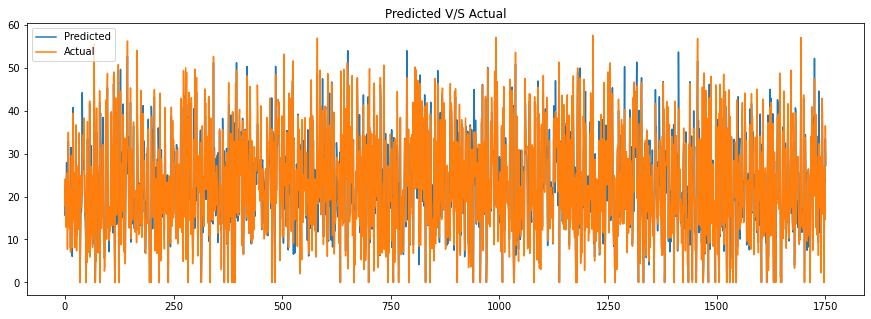

In [685]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

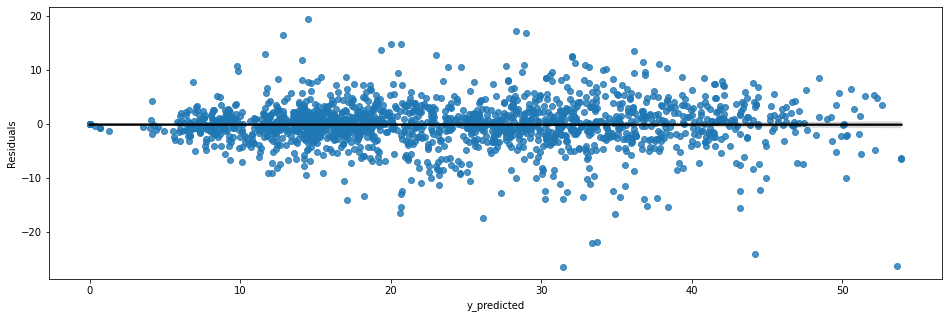

In [686]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Text(0.5, 0, 'Relative Importance')

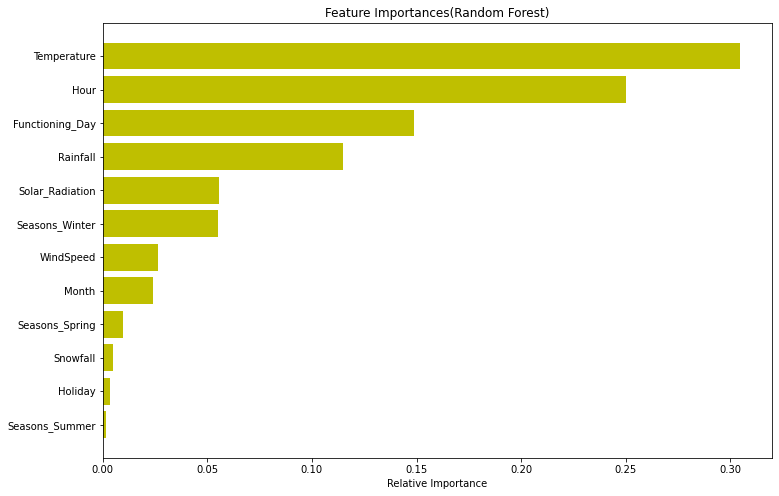

In [687]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [688]:
# Check Final dataframe of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result

Model     MAE      MSE  \
Training set 0                      Linear Regression  5.6523  54.5800   
             1                                  Lasoo  5.6540  54.5951   
             2                     Ridge GridSearchCV  5.6540  54.5951   
             3   Decision Tree Regressor-GridSearchCV  3.3404  22.8068   
             4           Gardient boosting Regression  3.2434  21.2421   
             5                          Random Forest  1.0568   2.5779   
Test set     0                      Linear Regression  5.7464  56.5025   
             1                                  Lasso  5.7529  56.5747   
             2             Ridge(GridsearchCv Tunned)  5.7529  56.5747   
             3  Decision Tree Regressor(GridsearchCV)  5.7464  56.5025   
             4           Gradient Boosting Regression  3.3403  22.9663   
             5                          Random forest  2.7806  17.4228   

                  RMSE  R2_score  Adjusted R2  
Training set 0  7.3878    0.6463        0.644  
             1  7.3888    0.6463        0.646  
             2  7.3888    0.6463        0.646  
             3  4.7756    0.8522        0.851  
             4  4.6089    0.8624        0.861  
             5  1.6056    0.9833        0.983  
Test set     0  7.5168    0.6412        0.639  
             1  7.5216    0.6408        0.639  
             2  7.5216    0.6408        0.639  
             3  7.5168    0.6412        0.639  
             4  4.7923    0.8542        0.853  
             5  4.1741    0.8894        0.889

# **Conclusion**



* Upon Exploratory Data Analysis, we found that the bike rentals follow an hourly trend where it hits the first peak in the morning and the highest peak later in the evening.
* We also found that these trends are prominent only during weekdays and working days, leading us to make a safe assumption that office-goers make a notable contribution to bike sharing demand.


*  In addition, seasons were observed to have a notable effect on bike rentals with high traffic during summer and a significantly lower demand in winter.
* When the rainfall was less, people have booked more bikes except some few cases.

* The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.
* From The above data frame, we can see that linear,Lasso,Ridge and Elastic regression models have almost similar R2 scores(61%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).


*  On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data it was very less. Thus our model memorised the data.So it was a overfitted model.
* Random forest Regressor and Gradient Boosting Regression gives the highest R2 score of 98% and 86%
recpectively for Train Set and 89% for Test set.


* The Gradient Boosting Regression and Random forest gives good r2 scores. We can deploy this models.
* From March Bike Rent Count started increasing and it was highest in June.There are much more rents during the day than the night.


* We also observed that there was a sudden peak between 6PM to 10 PM. Office time,College and going time could be the reason for this sudden peak (Weekdays).
*  On no functioning day no bikes were rented.Most of the bikes were rented on Weekdays compared to weekends.












